In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc('figure', figsize=(12,9))
mpl.rc('font', size=20.)
mpl.rc('font', family='serif')
mpl.rc('text', usetex=True)
mpl.rc('axes', color_cycle=['k','b','g','r','yellow'])

import pyGadget

# Density-selected disk

In [2]:
sim0 = pyGadget.sim.Simulation('stampede/vanilla', track_sinks=True)
sim1 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-3', track_sinks=True)
sim2 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-2', track_sinks=True)
sim3 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-1', track_sinks=True)

disk0 = pyGadget.sink.AccretionDisk(sim0, sim0.sink1)
disk1 = pyGadget.sink.AccretionDisk(sim1, sim1.sink1)
disk2 = pyGadget.sink.AccretionDisk(sim2, sim2.sink1)
disk3 = pyGadget.sink.AccretionDisk(sim3, sim3.sink1)

No sink specified: Selecting first sink to form...
Key set: nform = 1
Using sink ID 3103667
Found sinkfiles.  Loading sinkdata.
Key set: nform = 2
Using sink ID 3975878
No sink specified: Selecting first sink to form...
Key set: nform = 1
Using sink ID 3362134
Found sinkfiles.  Loading sinkdata.
Key set: nform = 2
Using sink ID 4394567
Key set: nform = 3
Using sink ID 4011741
No sink specified: Selecting first sink to form...
Key set: nform = 1
Using sink ID 3768236
Found sinkfiles.  Loading sinkdata.
Key set: nform = 2
Using sink ID 3755849
Key set: nform = 3
Using sink ID 3754749
Key set: nform = 4
Using sink ID 3975112
Key set: nform = 5
Using sink ID 4088092
Key set: nform = 6
Using sink ID 3719531
Key set: nform = 7
Using sink ID 4088845
Key set: nform = 8
Using sink ID 4407511
Key set: nform = 9
Using sink ID 4015446
Key set: nform = 10
Using sink ID 4958838
No sink specified: Selecting first sink to form...
Key set: nform = 1
Using sink ID 3962586
Found sinkfiles.  Loading sinkd

In [6]:
linestyle = ['-', '-', '-', '-', '-']
name = ['J = 0', 'J = J$_0$', 'J = 10 J$_0$', 'J = 100 J$_0$', 'J = 1000 J$_0$']

In [47]:
#n0, n1, n2, n3, tag = 615, 609, 236, 277, '_sink2'
#n0, n1, n2, n3, tag = 355, 269, 201, 200, '_t0'
#n0, n1, n2, n3, tag = 665, 575, 502, 501, '_t1k'
#n0, n1, n2, n3, tag = 974, 880, 802, 800, '_t2k'
#n0, n1, n2, n3, tag = 1283, 1184, 1100, 1100, '_t3k'
#n0, n1, n2, n3, tag = 1592, 1489, 1401, 1400, '_t4k'
n0, n1, n2, n3, tag = 1900, 1794, 1701, 1700, '_t5k'

## Disk Surface Density

"SELECT radius, mass FROM snapshot1900"
Recalculating...
Turning on gas particle refinement.
There are 7997231 highest resolution particles.
Tracking sinks.
2 sinks found.
12436 "disky" particles (51.9031719533) percent
11763 infalling particles (49.0943238731) percent
4322 "orbiting" particles (18.0383973289) percent
7201 "not orbiting" particles (30.0542570952) percent
Data loaded.  Analyzing...
Starting at 5.02e+01 AU
snapshot 1900 analyzed.
Saving table containing 2 entries to database.
"SELECT radius, mass FROM snapshot1794"
"SELECT radius, mass FROM snapshot1701"
"SELECT radius, mass FROM snapshot1700"


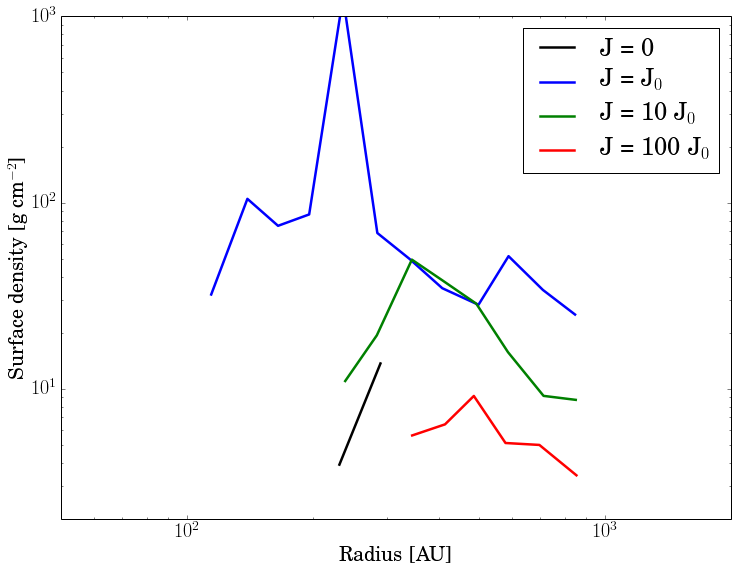

In [48]:
x = 'radius'
y = 'mass'
disk0.load(n0, x, y)
disk1.load(n1, x, y)
disk2.load(n2, x, y)
disk3.load(n3, x, y)
lw = 2.5
i = 0
for d in [disk0,disk1,disk2,disk3]:
    r = d.data[:,0]
    m = d.data[:,1]
    r2 = r * 1.49597871e13
    r1 = np.concatenate((np.array([0.]),r2[:-1]))
    a = np.pi * (r2*r2 - r1*r1)
    plt.loglog(r, m/a, label=name[i], ls=linestyle[i], lw=lw)
    i += 1
plt.xlim(50,2e3)
plt.ylim(2, 1e3)
plt.legend()
plt.xlabel('Radius [AU]')
plt.ylabel('Surface density [g cm$^{-2}$]')
plt.savefig('figures/disk/disk_surface_density'+tag+'.png', bbox_inches='tight')
plt.show()

## Check Orbital Frequency calculation

"SELECT radius, total_mass, vrot FROM snapshot1900"
"SELECT radius, total_mass, vrot FROM snapshot1794"
"SELECT radius, total_mass, vrot FROM snapshot1701"
"SELECT radius, total_mass, vrot FROM snapshot1700"


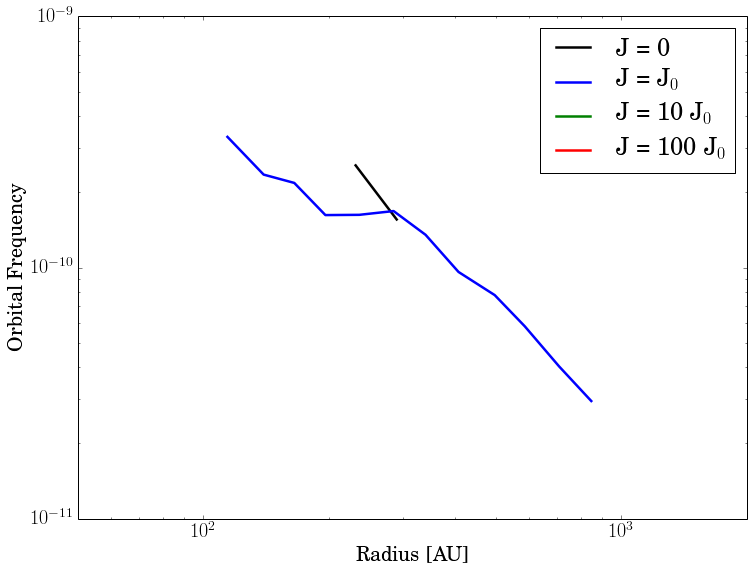

In [49]:
a = 'radius'
b = 'total_mass'
c = 'vrot'
disk0.load(n0, a, b, c)
disk1.load(n1, a, b, c)
disk2.load(n2, a, b, c)
disk3.load(n3, a, b, c)

color = ['k', 'b', 'g', 'r']
lw = 2.5
i = 0
for d in [disk0,disk1,disk2,disk3]:
    rau = d.data[:,0]
    m = d.data[:,1]*1.989e33
    vrot = d.data[:,2] * 1e5
    rcm = rau * 1.49597871e13
    OmegaK = np.sqrt(pyGadget.constants.GRAVITY * m / rcm**3)
    #plt.loglog(rau, OmegaK, c=color[i], ls='--', lw=lw)
    plt.loglog(rau, vrot/rcm, c=color[i], ls='-', lw=lw, label=name[i])
    i += 1
plt.xlim(50,2e3)
#plt.ylim(2e-12,2e-9)
plt.legend()
plt.xlabel('Radius [AU]')
plt.ylabel('Orbital Frequency')
plt.savefig('figures/disk/orbital_frequency'+tag+'.png', bbox_inches='tight')
plt.show()

"SELECT radius, total_mass, vrot FROM snapshot1900"
"SELECT radius, total_mass, vrot FROM snapshot1794"
"SELECT radius, total_mass, vrot FROM snapshot1701"
"SELECT radius, total_mass, vrot FROM snapshot1700"


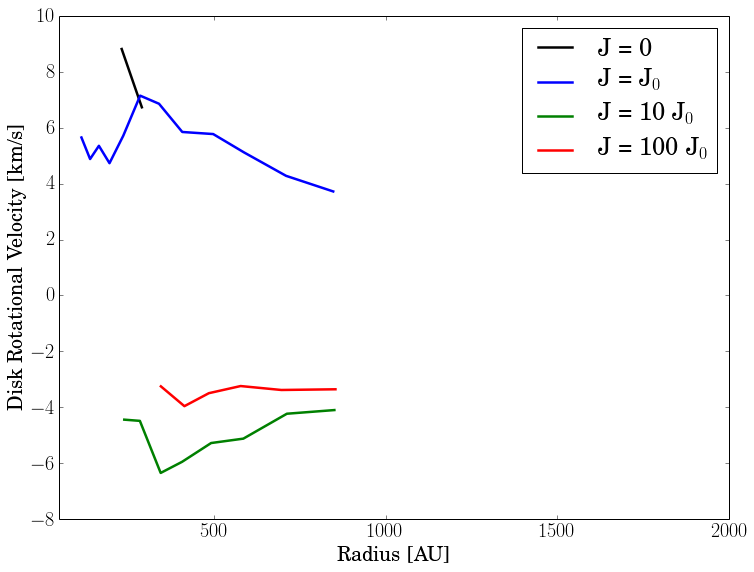

In [50]:
a = 'radius'
b = 'total_mass'
c = 'vrot'
disk0.load(n0, a, b, c)
disk1.load(n1, a, b, c)
disk2.load(n2, a, b, c)
disk3.load(n3, a, b, c)

gdata = np.genfromtxt('../../../data/otherPeoplesWork/Greif_et_al_2012/f1vrot.csv',
                      delimiter=',')
grau = gdata[:,0]
gvrot = gdata[:,1]

color = ['k', 'b', 'g', 'r']
lw = 2.5
i = 0
for d in [disk0,disk1,disk2,disk3]:
    rau = d.data[:,0]
    m = d.data[:,1]*1.989e33
    vrot = d.data[:,2]
    rcm = rau * 1.49597871e13
    vK = np.sqrt(pyGadget.constants.GRAVITY * m / rcm) / 1e5
    #plt.plot(rau, vK, c=color[i], ls='--', lw=lw)
    plt.plot(rau, vrot, c=color[i], ls='-', lw=lw, label=name[i])
    i += 1
#plt.plot(grau, gvrot, c='k', ls=':', lw=5)
plt.xlim(50,2e3)
#plt.ylim(0,15)
plt.legend()
plt.xlabel('Radius [AU]')
plt.ylabel('Disk Rotational Velocity [km/s]')
plt.savefig('figures/disk/vrot_comparison'+tag+'.png', bbox_inches='tight')
plt.show()

## Toomre Q

"SELECT radius, mass, cs, vrot, total_mass FROM snapshot1900"
"SELECT radius, mass, cs, vrot, total_mass FROM snapshot1794"
"SELECT radius, mass, cs, vrot, total_mass FROM snapshot1701"
"SELECT radius, mass, cs, vrot, total_mass FROM snapshot1700"


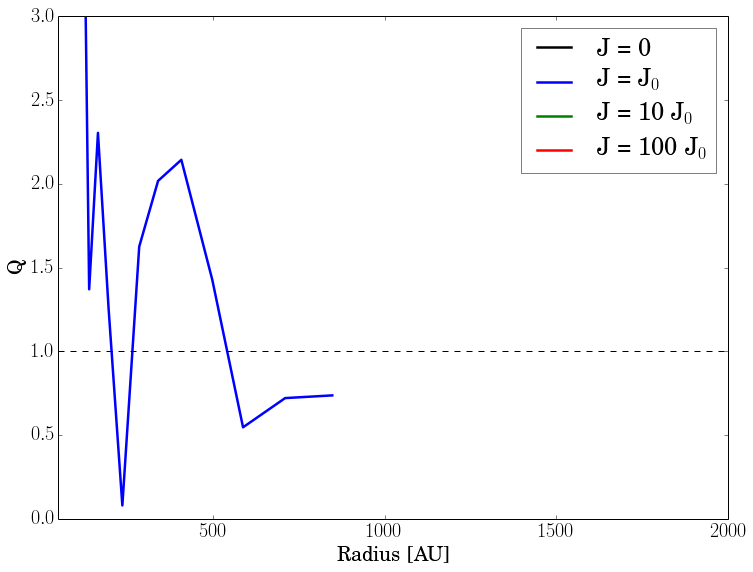

In [51]:
a = 'radius'
b = 'mass'
c = 'cs'
d = 'vrot'
e = 'total_mass'
disk0.load(n0, a,b,c,d,e)
disk1.load(n1, a,b,c,d,e)
disk2.load(n2, a,b,c,d,e)
disk3.load(n3, a,b,c,d,e)

lw = 2.5
i = 0
for d in [disk0,disk1,disk2,disk3]:
    r = d.data[:,0]
    m = d.data[:,1]
    cs = d.data[:,2]
    vrot = d.data[:,3] * 1e5
    m_enc = d.data[:,4]*1.989e33

    r2 = r * 1.49597871e13
    OmegaK = np.sqrt(pyGadget.constants.GRAVITY * m / r2**3)
    Omega = vrot/r2
    r1 = np.concatenate((np.array([0.]),r2[:-1]))
    a = np.pi * (r2*r2 - r1*r1)
    sigma = m/a
    Q = cs*Omega / (np.pi * pyGadget.constants.GRAVITY * sigma)
    Q2 = cs*OmegaK / (np.pi * pyGadget.constants.GRAVITY * sigma)
    plt.plot(r, Q, c=color[i], label=name[i], ls=linestyle[i], lw=lw)
    #plt.plot(r, Q2, c=color[i], ls='--', lw=lw)
    i += 1
#plt.semilogx()
plt.axhline(1, color='k',linestyle='--')
plt.xlim(50,2e3)
plt.ylim(0,3)
leg = plt.legend()#loc=2)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Radius [AU]')
plt.ylabel('Q')
plt.savefig('figures/disk/toomre_Q'+tag+'.png', bbox_inches='tight')
plt.show()